In [14]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import pickle

In [15]:
files = glob.glob('/Users/jane/Desktop/data-to-use/*.csv')

In [16]:
### Loading in cleanup function for category name. 
def get_cat_name(string):
    if string:
        if type(string) != float:
            content = ast.literal_eval(string)
            if type(content) == list:
                if len(content) != 0:
                    cat_name = content[0]
                    if type(content[0]) == list:
                        cat_name = content[0][0].split('/')[1] 
                    return cat_name

In [17]:
###Putting all the files into a df, and cleaning up the category names
for f in files:
    df = pd.read_csv(f)
df.dropna(subset=['categories'], inplace=True)
indexNames = df[df['categories'] == '[]'].index
df.drop(indexNames, inplace=True)
categories = df['categories'].to_list()
temp_lst = []
for e in categories:
    temp_lst.append(get_cat_name(e))    
df['categories'] = temp_lst

#Splitting up December through March 
dec = df[(df['months']  == 12) & (df['years']==2019)]
jan = df[(df['months']  == 1) & (df['years']==2020)] 
feb = df[(df['months']  == 2) & (df['years']==2020)]
mar = df[(df['months']  == 3) & (df['years']==2020)]

In [30]:
### Looking at category counts per day 

d_day= {}
dec_day = dec.groupby(['days', 'categories'])
for name, group_df in dec_day:
    day, cat = name
    count = len(group_df)
    if cat not in d_day:
        day_vec = [0 for i in range(32)]
        day_vec[day] += count
        d_day[cat] = day_vec
    else:
        d_day[cat][day] += count

j_day= {}
jan_day = jan.groupby(['days', 'categories'])
for name, group_df in jan_day:
    day, cat = name
    count = len(group_df)
    if cat not in j_day:
        day_vec = [0 for i in range(32)]
        day_vec[day] += count
        j_day[cat] = day_vec
    else:
        j_day[cat][day] += count
        
f_day= {}
feb_day = feb.groupby(['days', 'categories'])
for name, group_df in feb_day:
    day, cat = name
    count = len(group_df)
    if cat not in f_day:
        day_vec = [0 for i in range(30)]
        day_vec[day] += count
        f_day[cat] = day_vec
    else:
        f_day[cat][day] += count
        
m_day= {}
mar_day = mar.groupby(['days', 'categories'])
for name, group_df in mar_day:
    day, cat = name
    count = len(group_df)
    if cat not in m_day:
        day_vec = [0 for i in range(31)]
        day_vec[day] += count
        m_day[cat] = day_vec
    else:
        m_day[cat][day] += count

dec_df_day = pd.DataFrame.from_dict(d_day)
dec_df_day['day'] = dec_df_day.index
jan_df_day = pd.DataFrame.from_dict(j_day)
jan_df_day['day'] = jan_df_day.index
feb_df_day = pd.DataFrame.from_dict(f_day)
feb_df_day['day'] = feb_df_day.index
march_df_day = pd.DataFrame.from_dict(m_day)
march_df_day['day'] = march_df_day.index  




Text(0.5,1,'Count of top categories throughout December')

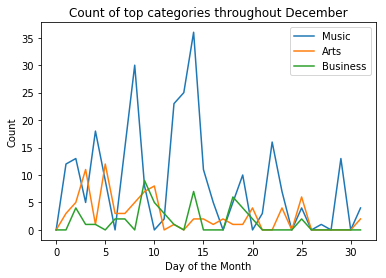

In [24]:
plot1 = plt.plot(dec_df_day['day'], dec_df_day['Music'], label='Music')
plot2 = plt.plot(dec_df_day['day'], dec_df_day['Arts & Entertainment'], label='Arts')
plot2 = plt.plot(dec_df_day['day'], dec_df_day['Business & Industrial'], label='Business')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of top three categories throughout December")

Text(0.5,1,'Count of top categories throughout January')

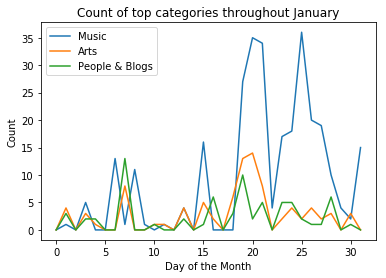

In [25]:
plot1 = plt.plot(jan_df_day['day'], jan_df_day['Music'], label='Music')
plot2 = plt.plot(jan_df_day['day'], jan_df_day['Entertainment'], label='Arts')
plot2 = plt.plot(jan_df_day['day'], jan_df_day['People & Blogs'], label='People & Blogs')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of top three categories throughout January")

Text(0.5,1,'Count of top three categories throughout February')

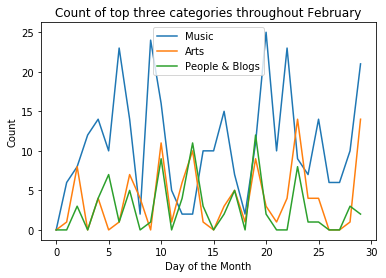

In [26]:
plot1 = plt.plot(feb_df_day['day'], feb_df_day['Music'], label='Music')
plot2 = plt.plot(feb_df_day['day'], feb_df_day['Entertainment'], label='Arts')
plot2 = plt.plot(feb_df_day['day'], feb_df_day['People & Blogs'], label='People & Blogs')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of top three categories throughout February")

Text(0.5,1,'Count of top three categories throughout March')

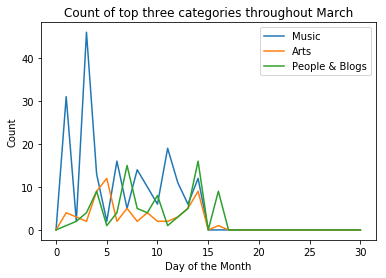

In [32]:
plot1 = plt.plot(march_df_day['day'], march_df_day['Music'], label='Music')
plot2 = plt.plot(march_df_day['day'], march_df_day['Entertainment'], label='Arts')
plot2 = plt.plot(march_df_day['day'], march_df_day['People & Blogs'], label='People & Blogs')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of top three categories throughout March")

Text(0.5,1,'Count of health, news, and science videos throughout January')

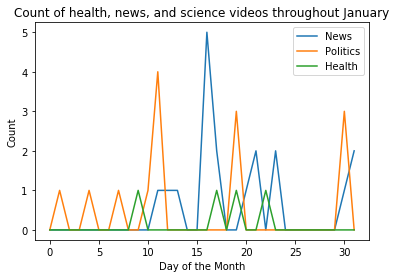

In [36]:
##COVID-19 Related YT categories - JAN
plot1 = plt.plot(jan_df_day['day'], jan_df_day['News'], label='News')
plot1 = plt.plot(jan_df_day['day'], jan_df_day['News & Politics'], label='Politics')
plot2 = plt.plot(jan_df_day['day'], jan_df_day['Health'], label='Health')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of health, news, and politics videos throughout January")

Text(0.5,1,'Count of health, news, and science videos throughout February')

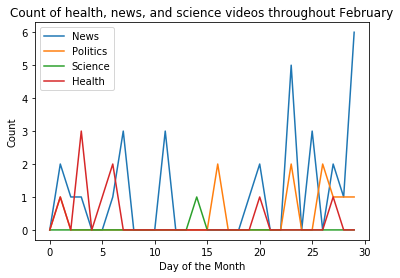

In [34]:
##COVID-19 Related YT categories- FEB
plot1 = plt.plot(feb_df_day['day'], feb_df_day['News'], label='News')
plot1 = plt.plot(feb_df_day['day'], feb_df_day['News & Politics'], label='Politics')
plot2 = plt.plot(feb_df_day['day'], feb_df_day['Science & Technology'], label='Science')
plot2 = plt.plot(feb_df_day['day'], feb_df_day['Health'], label='Health')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of health, news, and science videos throughout February")

Text(0.5,1,'Count of health, news, and science videos throughout March')

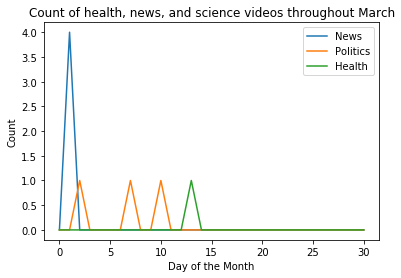

In [38]:
##COVID-19 Related YT categories- MAR
plot1 = plt.plot(march_df_day['day'], march_df_day['News'], label='News')
plot1 = plt.plot(march_df_day['day'], march_df_day['News & Politics'], label='Politics')
plot2 = plt.plot(march_df_day['day'], march_df_day['Health'], label='Health')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.legend()
plt.title("Count of health, news, and science videos throughout March")

In [20]:
### Looking at category counts per hour
d= {}
dec_hour = dec.groupby(['hours', 'categories'])
for name, group_df in dec_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in d:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        d[cat] = hr_vec
    else:
        d[cat][hr] += count

        
j= {}
jan_hour = jan.groupby(['hours', 'categories'])
for name, group_df in jan_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in j:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        j[cat] = hr_vec
    else:
        j[cat][hr] += count
f = {}       
feb_hour = feb.groupby(['hours', 'categories'])
for name, group_df in feb_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in f:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        f[cat] = hr_vec
    else:
        f[cat][hr] += count
        
m = {}       
mar_hour = mar.groupby(['hours', 'categories'])
for name, group_df in mar_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in m:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        m[cat] = hr_vec
    else:
        m[cat][hr] += count

        

dec_df = pd.DataFrame.from_dict(d)
dec_df['hour'] = dec_df.index
jan_df = pd.DataFrame.from_dict(j)
jan_df['hour'] = jan_df.index
feb_df = pd.DataFrame.from_dict(f)
feb_df['hour'] = feb_df.index
march_df = pd.DataFrame.from_dict(m)
march_df['hour'] = march_df.index



Text(0.5,1,'December search counts throughout the day of top 3 categories')

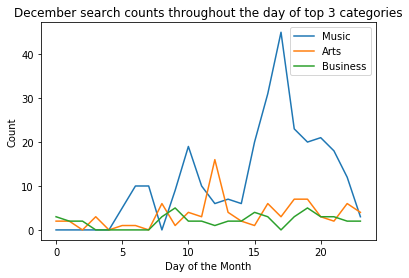

In [41]:
##Hourly activity- DEC
plot1 = plt.plot(dec_df['hour'], dec_df['Music'], label='Music')
plot2 = plt.plot(dec_df['hour'], dec_df['Arts & Entertainment'], label='Arts')
plot2 = plt.plot(dec_df['hour'], dec_df['Business & Industrial'], label='Business')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title("December search counts throughout the day of top 3 categories")

Text(0.5,1,'January search counts throughout the day of top 3 categories')

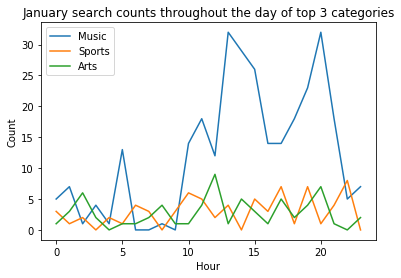

In [40]:
##Hourly activity- JAN
plot1 = plt.plot(jan_df['hour'], jan_df['Music'], label='Music')
plot1 = plt.plot(jan_df['hour'], jan_df['Sports'], label='Sports')
plot2 = plt.plot(jan_df['hour'], jan_df['Arts & Entertainment'], label='Arts')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title("January search counts throughout the day of top 3 categories")

Text(0.5,1,'February search counts throughout the day of top 3 categories')

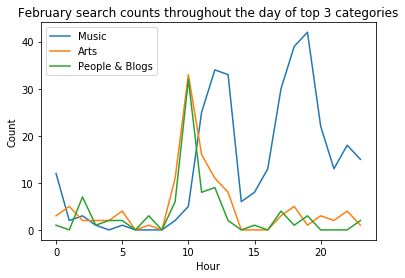

In [43]:
##Hourly activity- FEB
plot1 = plt.plot(feb_df['hour'], feb_df['Music'], label='Music')
plot2 = plt.plot(feb_df['hour'], feb_df['Entertainment'], label='Arts')
plot2 = plt.plot(feb_df['hour'], feb_df['People & Blogs'], label='People & Blogs')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title("February search counts throughout the day of top 3 categories")

Text(0.5,1,'February search counts throughout the day of top 3 categories')

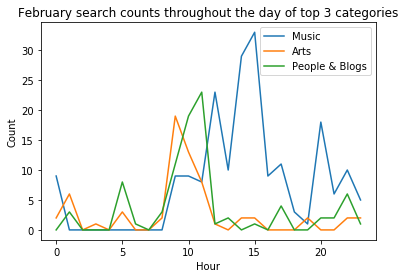

In [45]:
##Hourly activity- FEB
plot1 = plt.plot(march_df['hour'], march_df['Music'], label='Music')
plot2 = plt.plot(march_df['hour'], march_df['Entertainment'], label='Arts')
plot2 = plt.plot(march_df['hour'], march_df['People & Blogs'], label='People & Blogs')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title("February search counts throughout the day of top 3 categories")